In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
K_FOR_CORR = 22
ROUND_DENSITY_REG=4
# read csv to df:
path_to_csv = '/home/itay.nakash/smooth_language/results/SameInedx100000.csv'
df = pd.read_csv(path_to_csv)
df = df.drop('Unnamed: 0',axis=1)
numeric_df = df.select_dtypes(include=["number"])

In [74]:
def show_all_cols(df):
    num_in_line=5
    for i,col in enumerate(df):
        if i%num_in_line==num_in_line-1:
            print(col)
        else:
            print(col,end=",  ")
show_all_cols(df)

sen1,  sen2,  sen_len1,  sen_len2,  word1
word2,  index1,  index2,  layer,  n_exampels
sim,  std,  correct1,  correct1_cl,  correct1_cl_no_norm
correct2,  correct2_cl,  correct2_cl_no_norm,  bertscore_nm_r,  bertscore_nm_p
bertscore_nm_f1,  bertscore_m_r,  bertscore_m_p,  bertscore_m_f1,  logits1_masked
logits1_pred,  softmax1_masked,  softmax1_pred,  logits2_masked,  logits2_pred
softmax2_masked,  softmax2_pred,  logits1_masked_no_norm,  logits1_pred_no_norm,  softmax1_masked_no_norm
softmax1_pred_no_norm,  logits2_masked_no_norm,  logits2_pred_no_norm,  softmax2_masked_no_norm,  softmax2_pred_no_norm
logits1_masked_cl,  logits1_pred_cl,  softmax1_masked_cl,  softmax1_pred_cl,  logits2_masked_cl
logits2_pred_cl,  softmax2_masked_cl,  softmax2_pred_cl,  logits1_masked_cl_no_norm,  logits1_pred_cl_no_norm
softmax1_masked_cl_no_norm,  softmax1_pred_cl_no_norm,  logits2_masked_cl_no_norm,  logits2_pred_cl_no_norm,  softmax2_masked_cl_no_norm
softmax2_pred_cl_no_norm,  predicted_token1_cl,

In [75]:
def check_corr_for_col(df,target:str,num_of_col_toshow:int):
    # calculate corr matrix:
    corr_matrix = df.corr()

    # get the correlation matrix of the similarity feature:
    corr_matrix_sim=corr_matrix[target]

    # get the top_k by abs that corelate to the similarity:
    largest_abs_values = corr_matrix_sim.abs().nlargest(num_of_col_toshow)
    k_largest_values = corr_matrix_sim.loc[largest_abs_values.index]
    print(k_largest_values)

check_corr_for_col(numeric_df,'sim',K_FOR_CORR)

sim                          1.000000
layer                       -0.760678
logits1_pred_cl             -0.710249
logits2_pred_cl             -0.702377
logits1_masked_cl           -0.630895
logits2_masked_cl           -0.612146
logits1_masked_cl_no_norm   -0.541052
logits2_masked_cl_no_norm   -0.527885
softmax1_pred_cl            -0.492878
softmax2_pred_cl            -0.481776
softmax1_masked_cl          -0.399735
softmax2_masked_cl          -0.379199
logits1_pred_cl_no_norm     -0.368177
logits2_pred_cl_no_norm     -0.350477
correct1_cl                 -0.329656
correct2_cl                 -0.310750
softmax1_masked_no_norm     -0.103152
softmax2_masked_no_norm     -0.098293
bertscore_m_f1               0.094262
logits1_masked_no_norm      -0.092749
logits1_pred                -0.086421
bertscore_m_p                0.085617
Name: sim, dtype: float64


In [76]:
# why here I have a negetive corr to the similarity?
check_corr_for_col(df,'softmax1_masked_cl',K_FOR_CORR)

softmax1_masked_cl            1.000000
correct1_cl                   0.870516
softmax1_pred_cl              0.778324
logits1_masked_cl             0.730012
logits1_pred_cl               0.626275
layer                         0.498954
logits1_masked_cl_no_norm     0.481153
logits2_pred_cl               0.464461
logits2_masked_cl             0.439241
softmax1_masked               0.425732
softmax2_pred_cl              0.405077
sim                          -0.399735
logits1_masked                0.367495
correct1                      0.362578
softmax2_masked_cl            0.358835
softmax1_pred                 0.333875
logits1_pred                  0.310652
correct2_cl                   0.297617
logits2_masked_cl_no_norm     0.281007
logits1_masked_no_norm        0.266823
logits1_pred_cl_no_norm       0.244761
softmax1_masked_cl_no_norm    0.210992
Name: softmax1_masked_cl, dtype: float64


In [77]:
def print_reg_weights(df,model,target:str):  
    x = df.drop(target,axis=1)
    y = df[target]
    # Fit the regressor to the data
    model.fit(x, y)

    # Print the sorted weights and their corresponding column names
    weights = sorted(zip(numeric_df.columns, model.coef_), key=lambda x: x[1], reverse=True)
    for col, weight in weights:
        print(f"col: {col}, weight: {round(weight,ROUND_DENSITY_REG)} ")

In [78]:
linearRegg=LinearRegression()
print_reg_weights(numeric_df,linearRegg,'sim')

col: logits2_pred_cl_no_norm, weight: 363.7905 
col: logits1_pred_cl_no_norm, weight: 308.8562 
col: bertscore_nm_f1, weight: 3.9057 
col: bertscore_m_r, weight: 3.8784 
col: softmax2_masked_no_norm, weight: 1.2081 
col: softmax1_masked_no_norm, weight: 1.0552 
col: bertscore_nm_r, weight: 0.2324 
col: correct2_cl_no_norm, weight: 0.2243 
col: correct1, weight: 0.0113 
col: correct2, weight: 0.0113 
col: softmax1_masked_cl, weight: 0.0064 
col: softmax2_masked_cl, weight: 0.0056 
col: softmax2_masked, weight: 0.0052 
col: correct1_cl_no_norm, weight: 0.0038 
col: logits2_masked_no_norm, weight: 0.0023 
col: softmax1_pred, weight: 0.0018 
col: bertscore_m_f1, weight: 0.0016 
col: logits1_pred, weight: 0.0015 
col: logits1_masked_no_norm, weight: 0.0014 
col: softmax2_pred_no_norm, weight: 0.0013 
col: softmax1_masked, weight: 0.0012 
col: softmax1_pred_cl, weight: 0.0011 
col: softmax1_pred_no_norm, weight: 0.0003 
col: sen_len2, weight: 0.0001 
col: sen_len1, weight: 0.0001 
col: index

In [79]:
# currently zero, maybe change regulation. but I guess it say its hard to predict the sim by those features.
lasso=Lasso()
print_reg_weights(numeric_df,lasso,'sim')

col: sen_len1, weight: 0.0 
col: sen_len2, weight: -0.0 
col: index1, weight: 0.0 
col: index2, weight: 0.0 
col: layer, weight: -0.0 
col: n_exampels, weight: 0.0 
col: sim, weight: 0.0 
col: std, weight: -0.0 
col: correct1, weight: -0.0 
col: correct1_cl, weight: 0.0 
col: correct1_cl_no_norm, weight: -0.0 
col: correct2, weight: -0.0 
col: correct2_cl, weight: 0.0 
col: correct2_cl_no_norm, weight: 0.0 
col: bertscore_nm_r, weight: 0.0 
col: bertscore_nm_p, weight: 0.0 
col: bertscore_nm_f1, weight: 0.0 
col: bertscore_m_r, weight: 0.0 
col: bertscore_m_p, weight: 0.0 
col: bertscore_m_f1, weight: -0.0 
col: logits1_masked, weight: -0.0 
col: logits1_pred, weight: -0.0 
col: softmax1_masked, weight: -0.0 
col: softmax1_pred, weight: -0.0 
col: logits2_masked, weight: -0.0 
col: logits2_pred, weight: -0.0 
col: softmax2_masked, weight: -0.0 
col: softmax2_pred, weight: -0.0 
col: logits1_masked_no_norm, weight: -0.0 
col: logits1_pred_no_norm, weight: -0.0 
col: softmax1_masked_no_n

<AxesSubplot:>

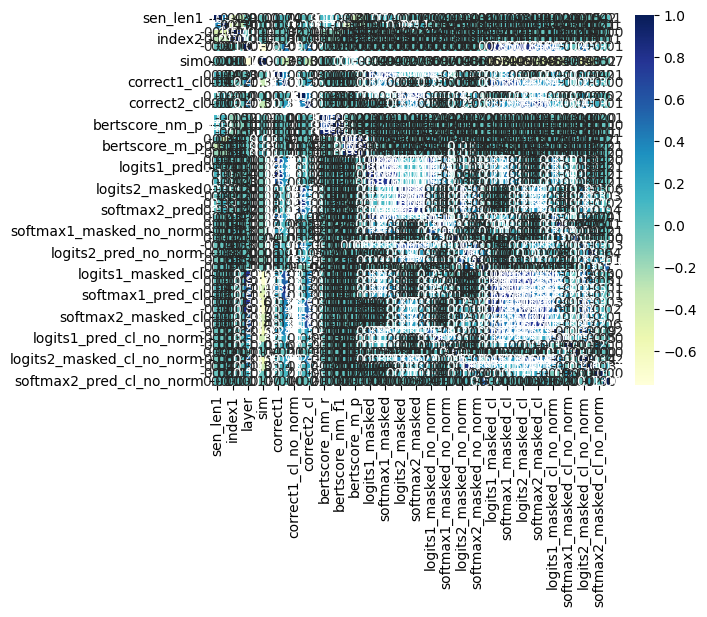

<AxesSubplot:xlabel='softmax1_masked_cl', ylabel='sim'>

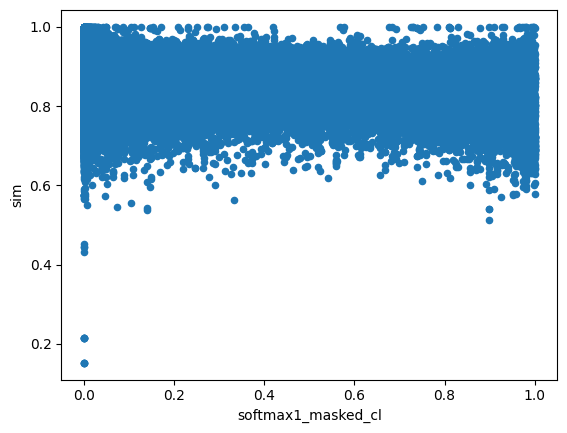

In [81]:

df.plot.scatter(x='softmax1_masked_cl',y='sim', cmap='viridis')

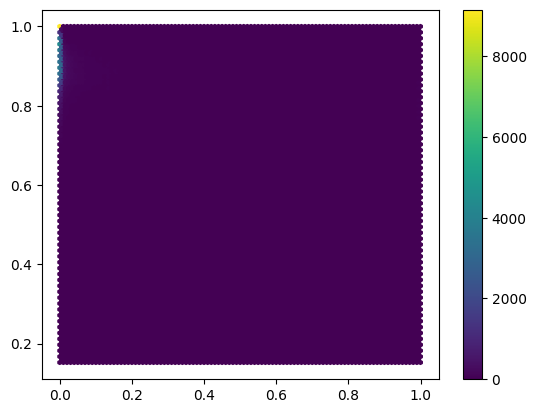

<AxesSubplot:xlabel='layer', ylabel='sim'>

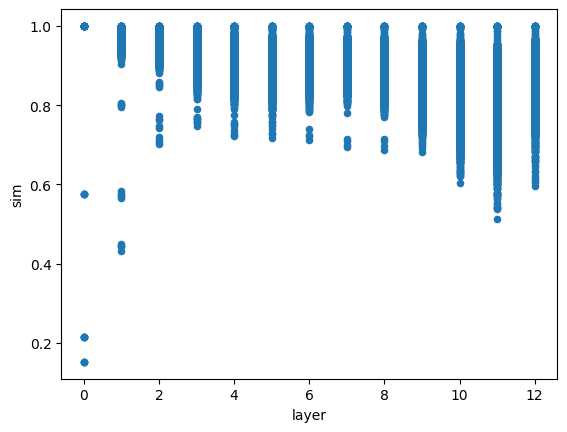

In [82]:
# TODO: remove all "mistakes" (few examples where the sim is not 1 in layer 0)

# thats a bit weird? why there are strict holes in spesific layers? there isn't any real pattern I think,
# so I'm not sure if its meaningful, but maybe can show how 'dicotomic' the model is in different layers?
df.plot.scatter(x='layer',y='sim', cmap='viridis')

In [97]:
def plot_mean_of_two_cols(df,x_str:str,y_str:str):
    mean_y_by_x = df.groupby(x_str)[y_str].mean()

    ax= mean_y_by_x.plot(x=x_str,y=y_str,kind='line')

    ax.set_ylabel(y_str)
    ax.set_xlabel(x_str)
    plt.show()

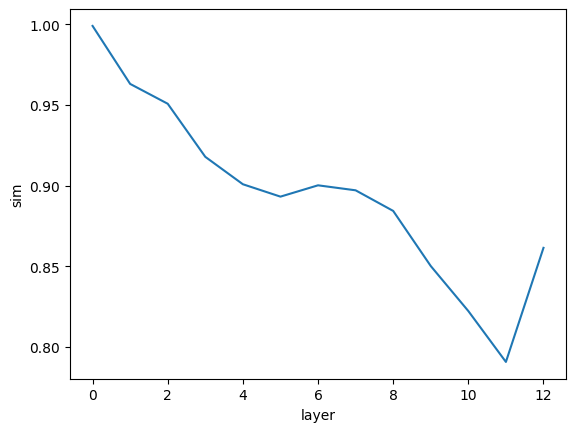

In [98]:
plot_mean_of_two_cols(df,x_str='layer',y_str='sim')

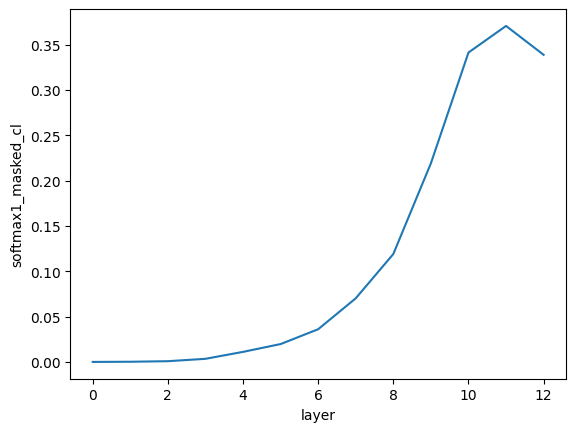

In [99]:
plot_mean_of_two_cols(df,x_str='layer',y_str='softmax1_masked_cl')

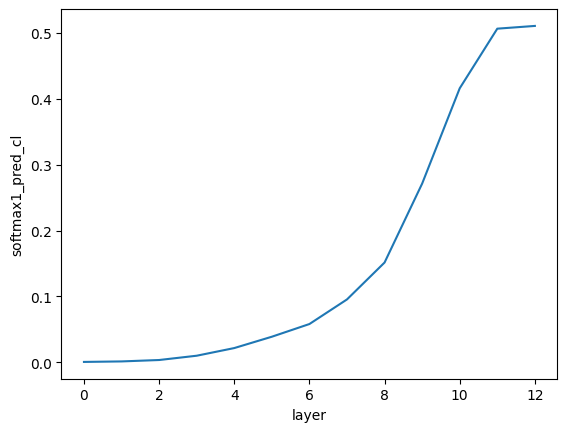

In [100]:
plot_mean_of_two_cols(df,x_str='layer',y_str='softmax1_pred_cl')

<AxesSubplot:xlabel='bertscore_m_f1', ylabel='sim'>

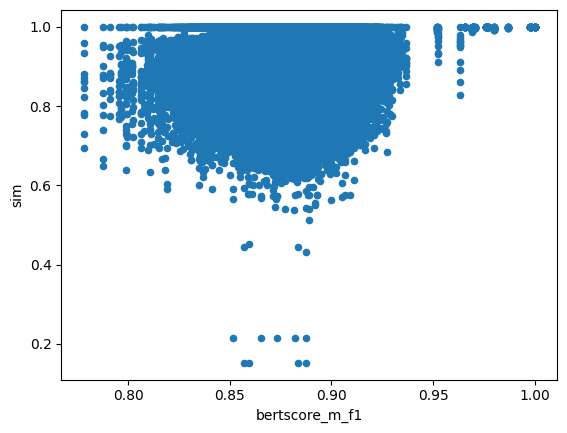

In [84]:
df.plot.scatter(x='bertscore_m_f1',y='sim', cmap='viridis')

In [92]:
def createHeatMap(x,y):
    plt.hexbin(x,y)
    # Add a colorbar
    plt.colorbar()

    # Show the plot
    plt.show()

def corrHeatmap(df):
    # too many features, not informative:
    corr_matrix = df.corr()
    # Create a heatmap of the correlation matrix
    sns.heatmap(corr_matrix, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f")

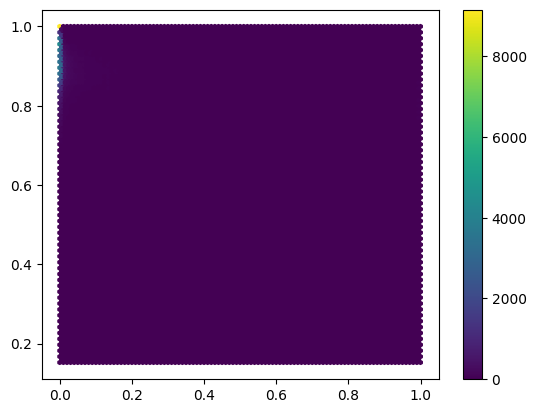

In [90]:
x=df['softmax1_masked_cl']
y=df['sim']
createHeatMap(x,y)

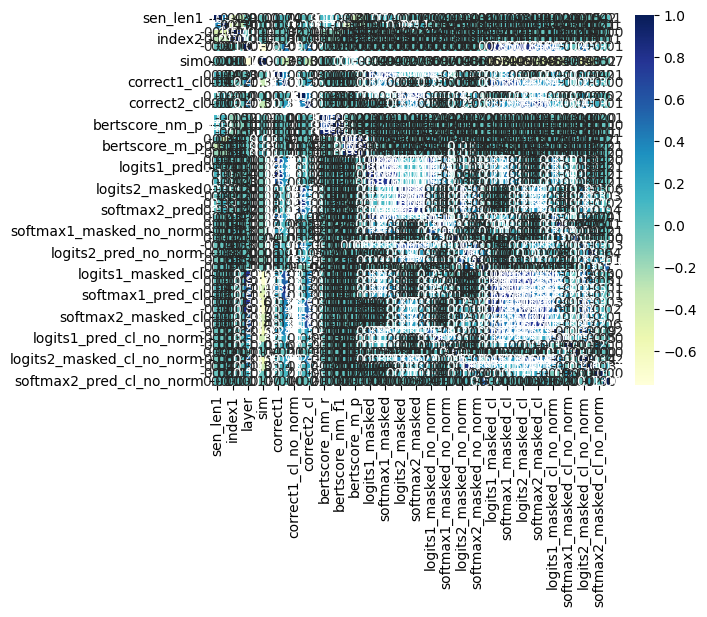

In [93]:
corrHeatmap(df)